<a href="https://colab.research.google.com/github/lovepreetmultani/python/blob/main/Loan_Default_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan Default Indicator

Life cycle of Machine learning Project

*   Understanding the Problem Statement
*   Data Collection
*   Data Checks to perform
*   Exploratory data analysis
*   Data Pre-Processing
*   Model Training
*   Choose best model

1) Problem statement
This project understands how the how loan default (test scores) is affected by other variables such as int_rate, loan_amnt, term,  annual_inc, and  emp_length

2 ) Data Collection
The data consists of 27 columns and 396030 rows.

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [122]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
loan_df=pd.read_csv("drive/My Drive/TensorFlow_FILES/DATA/lending_data.csv")

**Data Preprocessing**

In [124]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [125]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [126]:
loan_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [127]:
len(loan_df)

396030

In [128]:
loan_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [129]:
100 * loan_df.isnull().sum() / len(loan_df) # To find the percentage of missing values from different columns

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [130]:
loan_df['emp_title'].nunique()

173105

In [131]:
loan_df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [132]:
loan_df = loan_df.drop('emp_title', axis=1)

In [133]:
sorted(loan_df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [134]:
emp_length_order =['1 year',
  '< 1 year', 
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years']

<Axes: xlabel='emp_length', ylabel='count'>

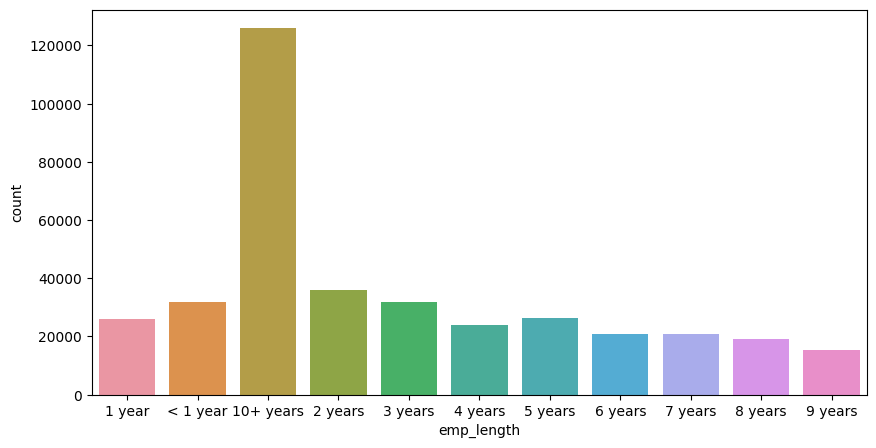

In [135]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=loan_df, order = emp_length_order)

In [136]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


**Exploratory Data Analysis**

<Axes: xlabel='loan_status', ylabel='count'>

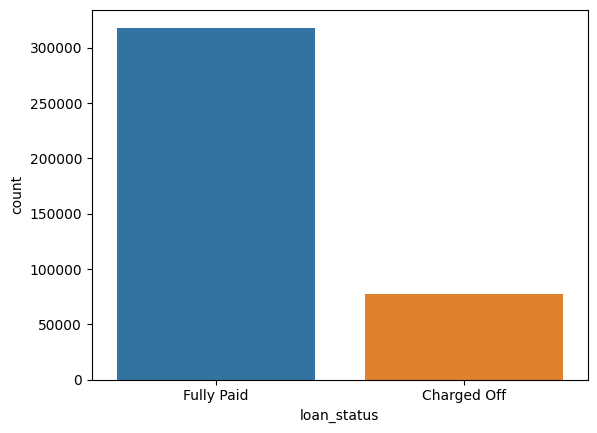

In [137]:
sns.countplot(x='loan_status',data=loan_df)

<Figure size 1000x800 with 0 Axes>

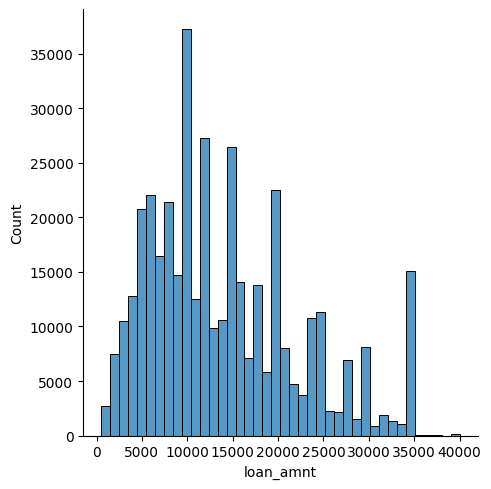

In [138]:
plt.figure(figsize=(10,8))
sns.displot(loan_df['loan_amnt'],kde=False, bins=40)

In [139]:
loan_df.corr()

<ipython-input-139-afaf4ec9ae8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<ipython-input-140-2d7b9add8ac4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_df.corr(),annot=True)


<Axes: >

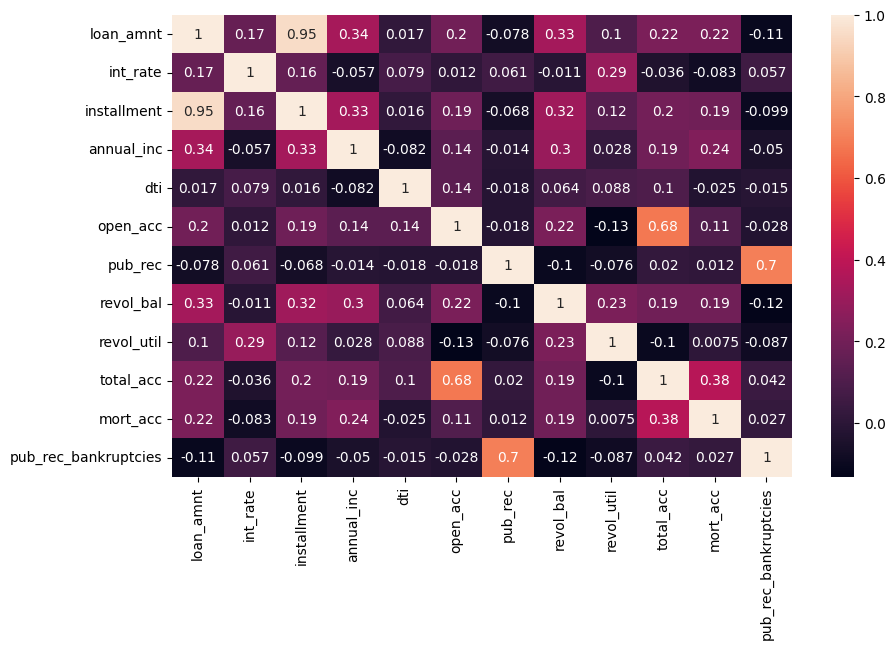

In [140]:
plt.figure(figsize=(10,6))
sns.heatmap(loan_df.corr(),annot=True)

<Axes: xlabel='installment', ylabel='loan_amnt'>

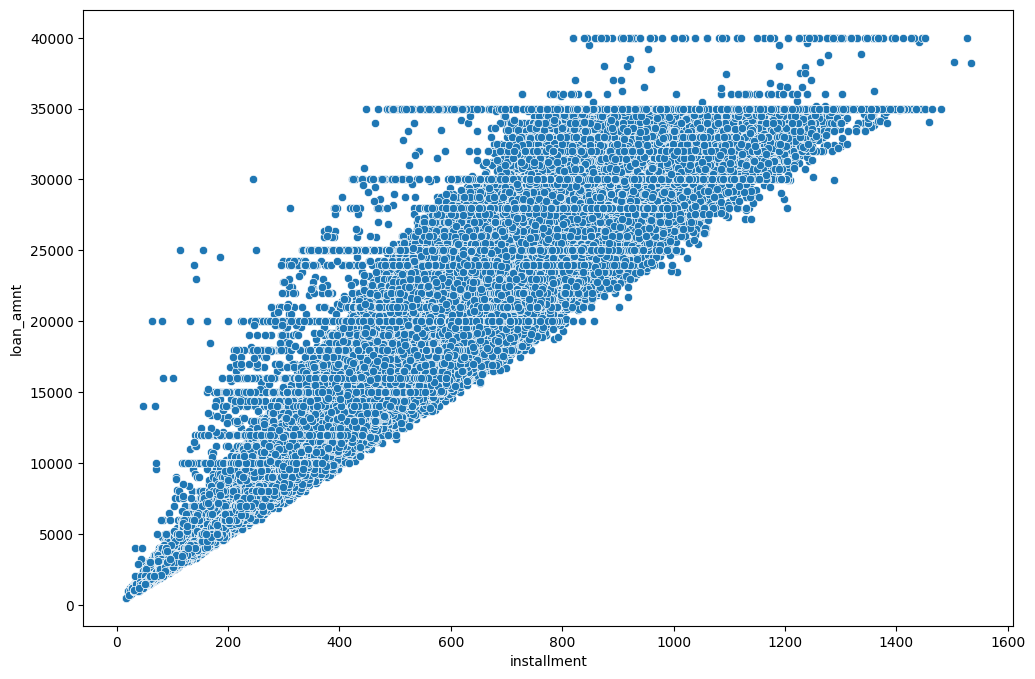

In [141]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='loan_amnt',x='installment', data=loan_df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

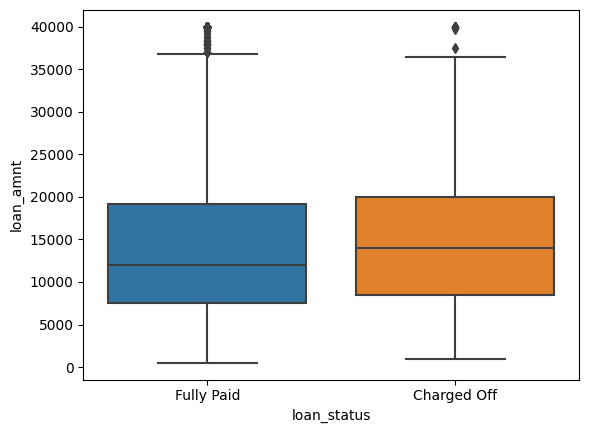

In [142]:
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df) #less amount loan is paid off instead of more amount

In [143]:
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [144]:
loan_df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [145]:
loan_df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

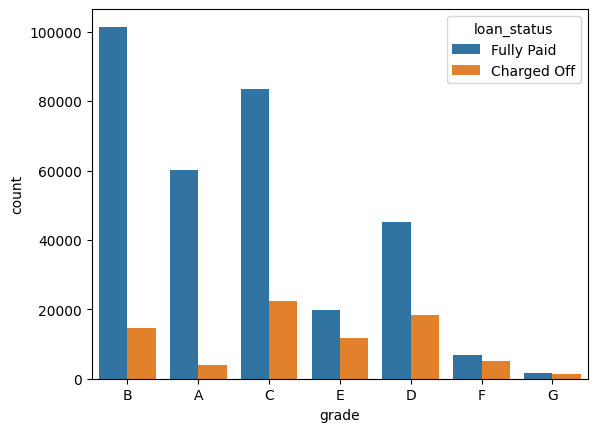

In [146]:
sns.countplot(x='grade',hue='loan_status',data=loan_df)

<Axes: xlabel='sub_grade', ylabel='count'>

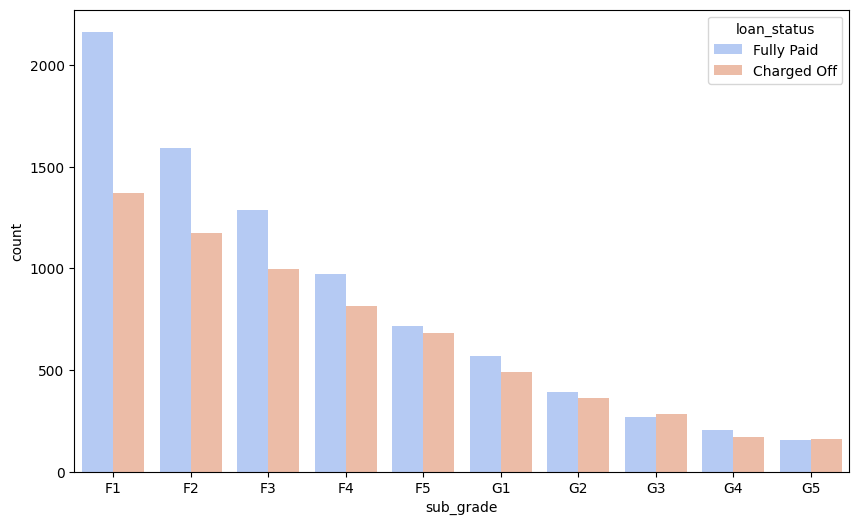

In [147]:
f_and_g = loan_df[(loan_df['grade']=='F') | (loan_df['grade']=='G')]
plt.figure(figsize=(10,6))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g, order=subgrade_order, palette='coolwarm', hue='loan_status')

In [148]:
loan_df['loan_repaid'] = loan_df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [149]:
loan_df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [150]:
loan_df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [151]:
loan_df['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

In [152]:
emp_fullyPaid = loan_df[loan_df['loan_repaid']==1].groupby('emp_length').count()['loan_status']

In [153]:
emp_chargeOff = loan_df[loan_df['loan_repaid']==0].groupby('emp_length').count()['loan_status']

In [154]:
emp_length = emp_chargeOff/(emp_fullyPaid+emp_chargeOff)

<Axes: xlabel='emp_length'>

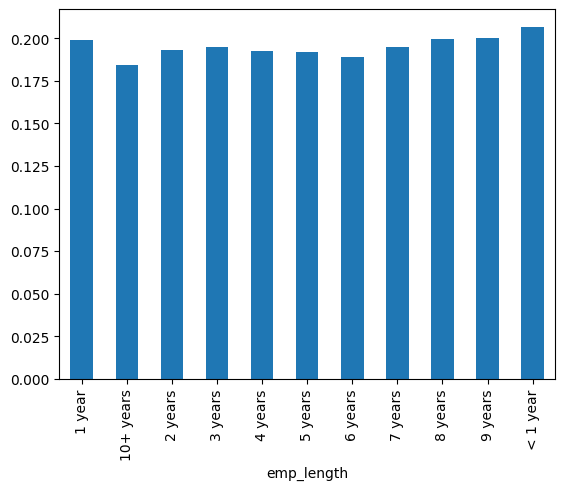

In [155]:
emp_length.plot(kind='bar')

In [156]:
loan_df = loan_df.drop('emp_length',axis=1)

In [157]:
loan_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [159]:
loan_df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [160]:
acc_avg = loan_df.groupby('total_acc').mean()['mort_acc'] #mort_acc is highly correlated to total_acc so replacing missing values of mort_acc to total_acc

<ipython-input-160-8056f080b7b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acc_avg = loan_df.groupby('total_acc').mean()['mort_acc'] #mort_acc is highly correlated to total_acc so replacing missing values of mort_acc to total_acc


In [161]:
def fill_morr_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return acc_avg[total_acc]
  else:
    return mort_acc

In [162]:
loan_df['mort_acc'] = loan_df.apply(lambda x: fill_morr_acc(x['total_acc'],x['mort_acc']),axis =1)

In [163]:
loan_df = loan_df.dropna()

In [164]:
loan_df.select_dtypes(['object']).columns #to get string values

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [165]:
loan_df['term'] = loan_df['term'].apply(lambda term : int(term[:3]))

In [166]:
loan_df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [167]:
loan_df = loan_df.drop('grade',axis=1)

In [168]:
subgrade_dummies = pd.get_dummies(loan_df['sub_grade'],drop_first=True)
loan_df = pd.concat([loan_df.drop('sub_grade', axis=1),subgrade_dummies],axis=1)

In [169]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [170]:
dummies = pd.get_dummies(loan_df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
loan_df = pd.concat([loan_df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1),dummies],axis=1)

In [171]:
loan_df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [172]:
loan_df['home_ownership'] = loan_df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [173]:
home_dummies = pd.get_dummies(loan_df['home_ownership'],drop_first=True)
loan_df = pd.concat([loan_df.drop('home_ownership', axis=1),home_dummies],axis=1)

In [174]:
loan_df['zipcode'] = loan_df['address'].apply(lambda address : address[-5:])

In [175]:
loan_df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [176]:
zipcode_dummies = pd.get_dummies(loan_df['zipcode'],drop_first=True)
loan_df = pd.concat([loan_df.drop('zipcode', axis=1),zipcode_dummies],axis=1)

In [177]:
loan_df=loan_df.drop('address',axis=1)

In [178]:
loan_df=loan_df.drop('issue_d',axis=1)

In [179]:
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [180]:
loan_df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [181]:
loan_df=loan_df.drop('loan_status',axis=1)

In [182]:
X = loan_df.drop('loan_repaid',axis=1).values
y=loan_df['loan_repaid'].values

In [183]:
X.shape

(395219, 78)

In [184]:
y.shape

(395219,)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [186]:
scaler = StandardScaler()

In [187]:
loan_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


In [188]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [190]:
from tensorflow.keras.callbacks import EarlyStopping

In [191]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 25)

In [192]:
  model = Sequential()

  model.add(Dense(units = 78, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 39, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 19, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1

  model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [193]:
model.fit(x=X_train,y=y_train,batch_size=256,epochs=25 ,
          validation_data=(X_test,y_test),
           callbacks=[early_stop])

Epoch 1/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3007 - val_loss: 0.2652
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2644 - val_loss: 0.2614
Epoch 3/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2609 - val_loss: 0.2599
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2590 - val_loss: 0.2597
Epoch 5/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2578 - val_loss: 0.2610
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2573 - val_loss: 0.2592
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2568 - val_loss: 0.2585
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2561 - val_loss: 0.2581
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2559 - val_loss: 0.2584
Epoch 10/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.255

In [194]:
from tensorflow.keras.models import load_model

In [195]:
model.save('loanDefaultClassifier.h5')

In [196]:
losses = pd.DataFrame(model.history.history)

<Axes: >

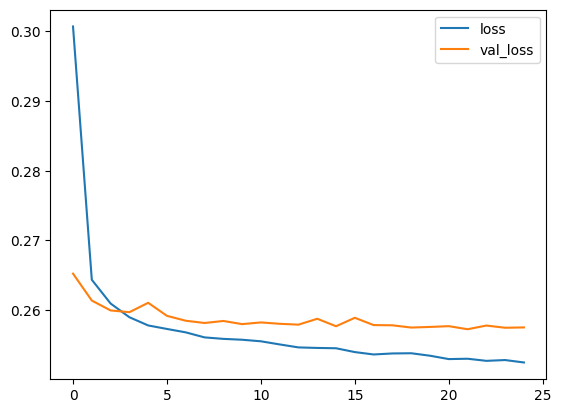

In [197]:
losses.plot()

In [198]:
from sklearn.metrics import classification_report, confusion_matrix

In [199]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)

2471/2471 [==============================] - 3s 1ms/step


In [200]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [201]:
print(confusion_matrix(y_test, predictions))

[[ 7074  8584]
 [  252 63134]]


In [202]:
import random
random.seed(101)
random_ind = random.randint(0,len(loan_df))

new_customer = loan_df.drop('loan_repaid',axis=1).iloc[random_ind]

In [203]:
new_customer = new_customer.values.reshape(1,78)

In [204]:
new_customer = scaler.transform(new_customer)

In [205]:
decision = model.predict(new_customer)
decision = np.round(decision).astype(int)
decision

1/1 [==============================] - 0s 32ms/step


array([[1]])

In [206]:
loan_df.iloc[random_ind]['loan_repaid']

1.0